In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [33]:
df = pd.read_csv("../reference/TRBV_human.distances.txt", sep=" ")
df.head()

,acc1,acc2,distance.all,distance.replacements
0,TRBV9*03,TRBV7-9*04,113,87
1,TRBV9*03,TRBV1*01,112,84
2,TRBV9*03,TRBV13*02,72,62
3,TRBV9*03,TRBV7-3*03,113,88
4,TRBV9*03,TRBV7-9*02,108,89


In [39]:
max_value = df['distance.replacements'].max()+100 # should be higher than highest value in the table
print(max_value)
accs = list(set(df['acc1'].tolist() + df['acc2'].tolist()))
df_matrix = df.pivot_table(columns='acc1', index='acc2', values='distance.replacements')
df_matrix = df_matrix.fillna(max_value)
df_matrix = max_value - df_matrix

220


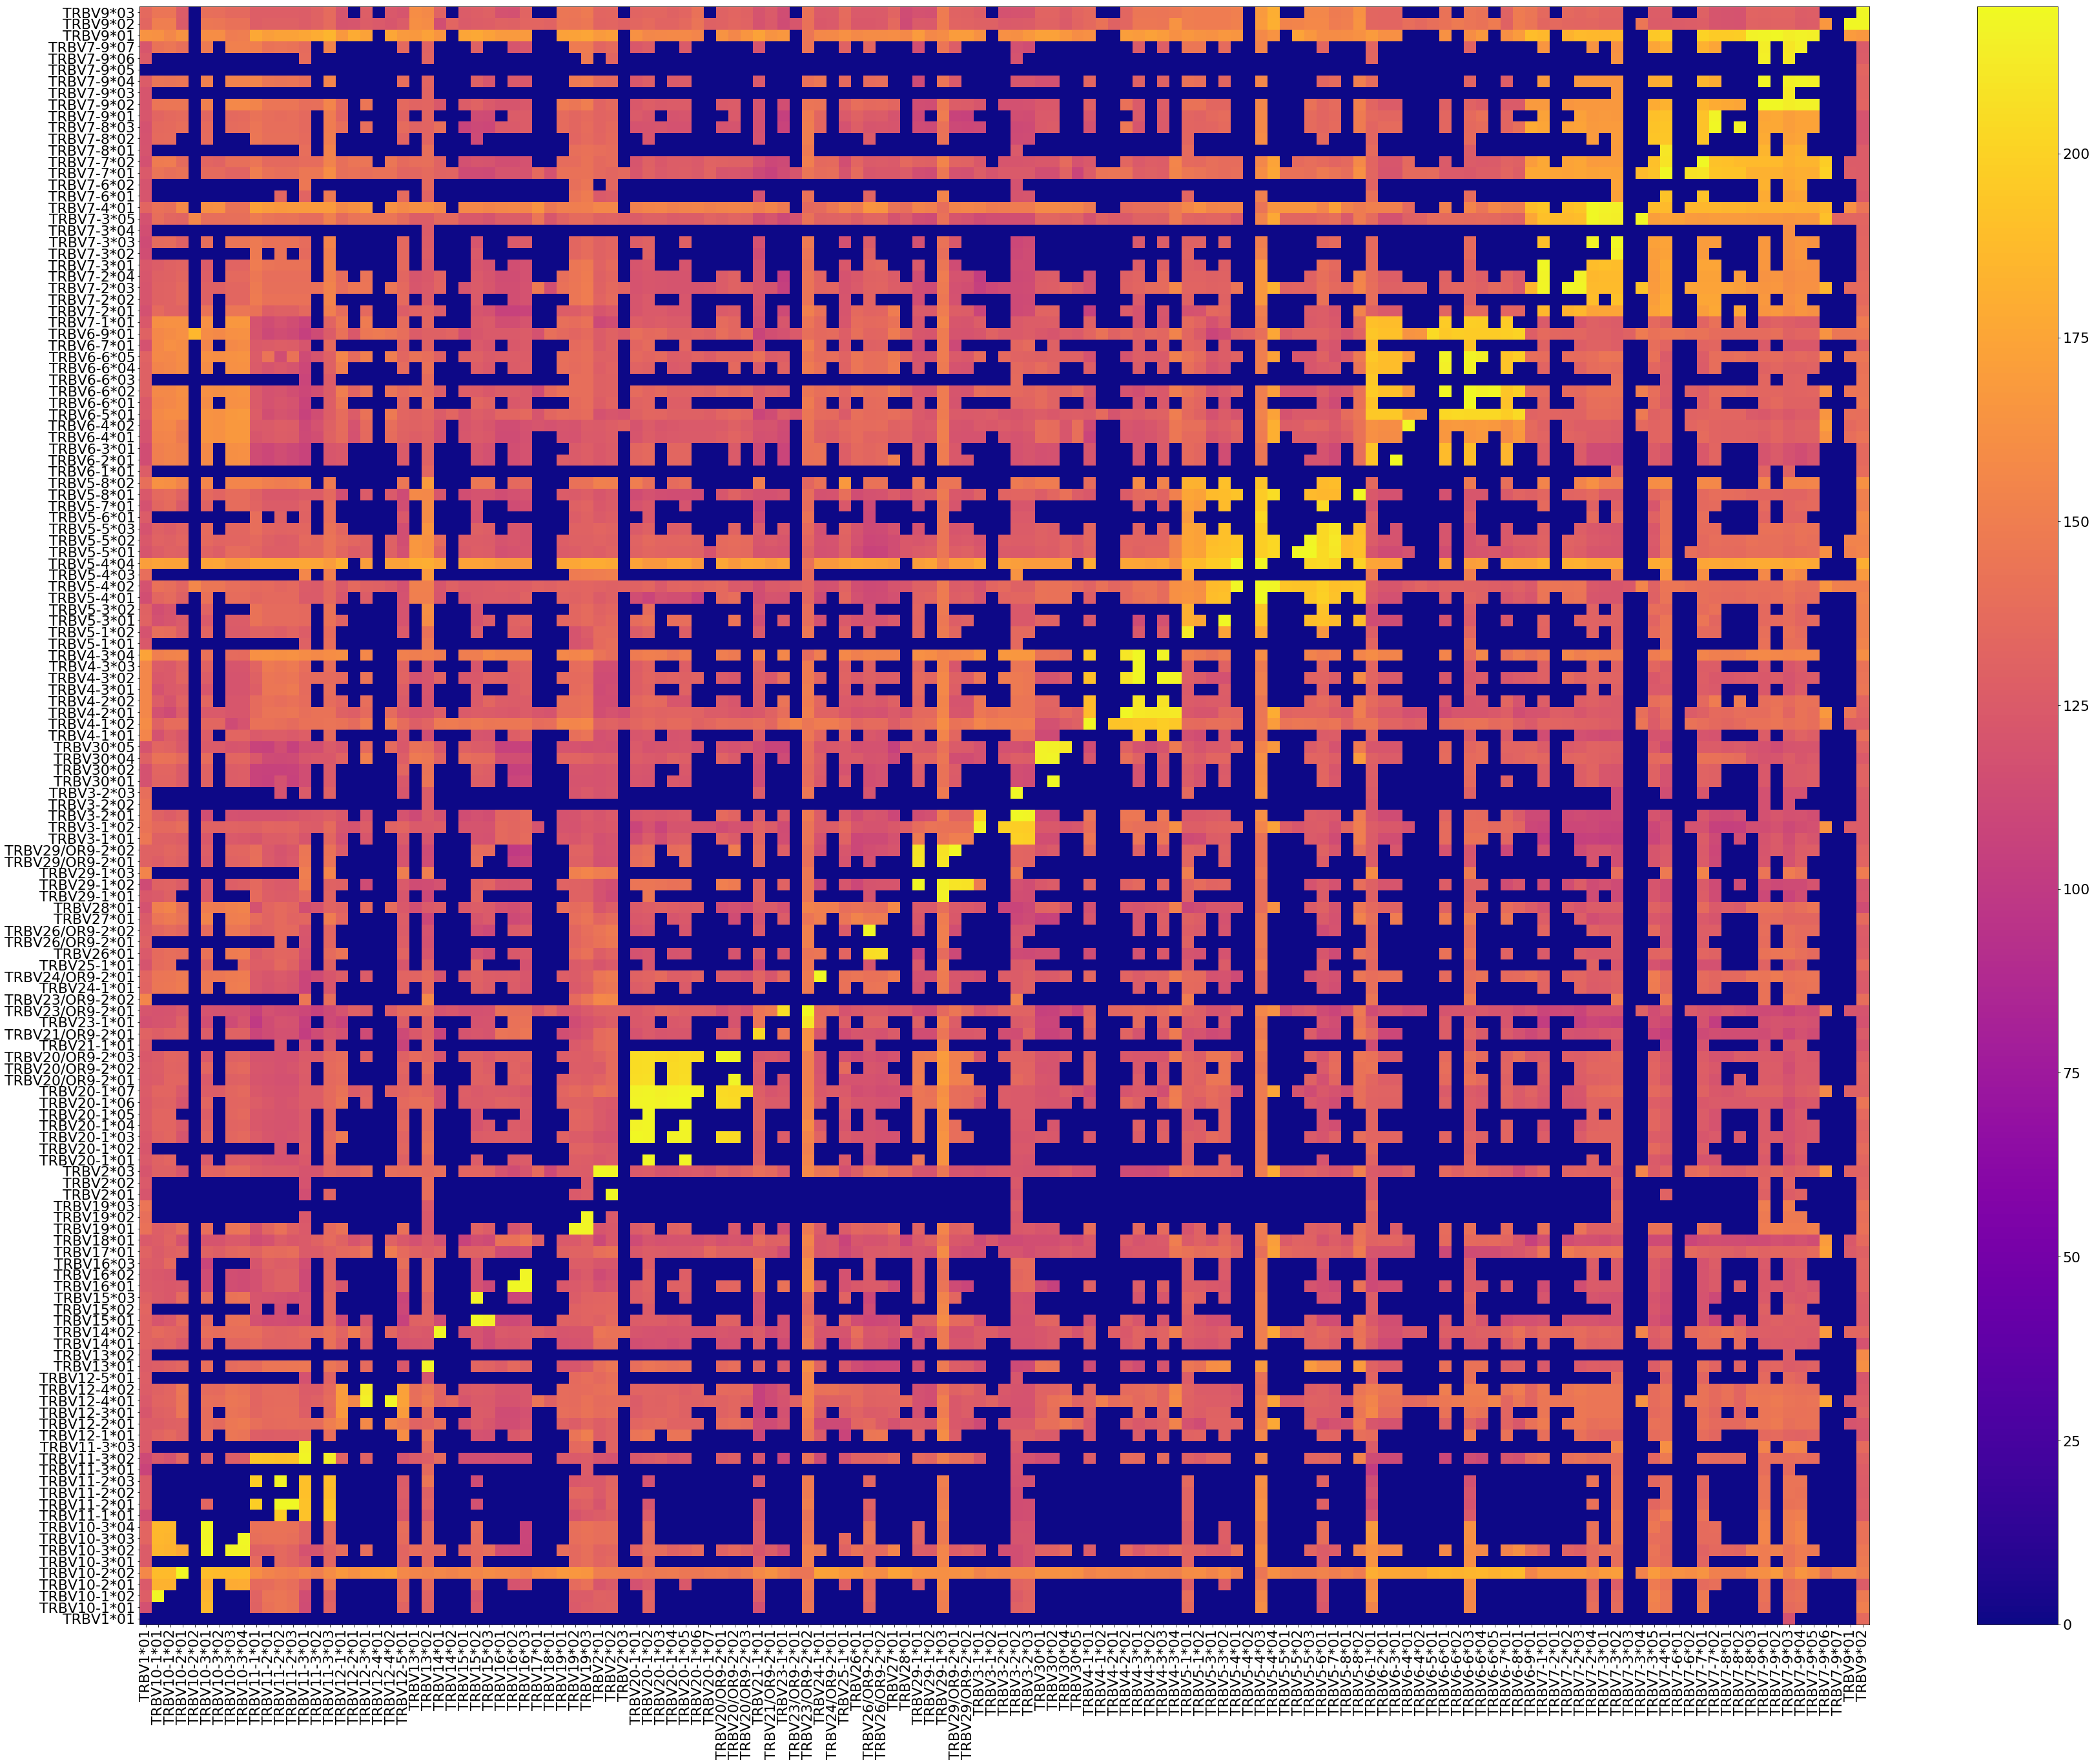

In [41]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(60, 60))
fig.subplots_adjust(bottom=0.3)

# draw heatmap
plt.pcolor(df_matrix.values, cmap=plt.cm.plasma)
plt.colorbar()
plt.xticks(np.arange(0.5, len(df_matrix.columns), 1), df_matrix.index, rotation=90)
plt.yticks(np.arange(0.5, len(df_matrix.index), 1), df_matrix.columns, rotation=0)
plt.show()

## WARNING
The figure is not as expected. I expected values that are mirrored along the diagonal